In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ab_test = pd.read_csv("ab_test_click_data.csv")

print(df_ab_test.head())
print(df_ab_test.describe())
print(df_ab_test.groupby("group").sum("click"))

   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000
         user_id  click
group                  
con    150005000   1989
exp     50005000   6116


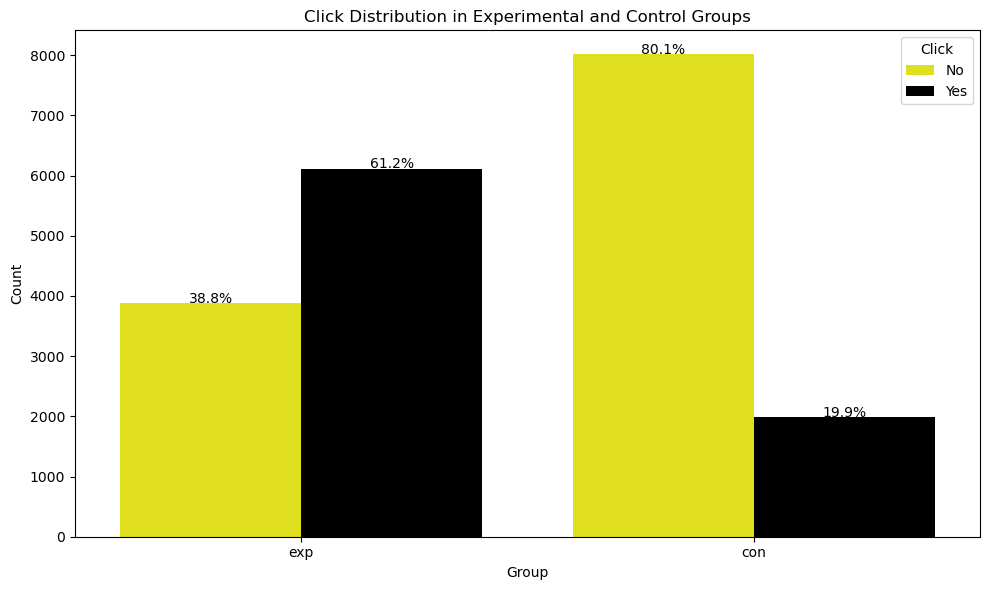

In [3]:
palette = {0: 'yellow', 1: 'black'}
    
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(x='group', hue='click', data=df_ab_test, palette=palette)
plt.title('Click Distribution in Experimental and Control Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title ='Click', labels=['No', 'Yes'])

group_counts = df_ab_test.groupby(['group']).size()
group_click_counts = df_ab_test.groupby(['group', 'click']).size().reset_index(name='count')

for p in ax.patches:
    height = p.get_height()
    group = 'exp' if p.get_x() < 0.5 else 'con'
    click = 1 if p.get_x() % 1 > 0.5 else 0
    total = group_counts.loc[group]
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{percentage:.1f}%', ha="center", color='black', fontsize=10)
    
plt.tight_layout()
plt.show()
    

In [4]:
alpha = 0.05
print("Significance level of Alpha is=", alpha)

beta = 0.1
print("Significance level of Beta is=", beta)

Significance level of Alpha is= 0.05
Significance level of Beta is= 0.1


In [6]:
N_con = df_ab_test[df_ab_test["group"] == "con"].count()
N_exp = df_ab_test[df_ab_test["group"] == "exp"].count()

x_con =df_ab_test.groupby("group")["click"].sum().loc["con"]
x_exp =df_ab_test.groupby("group")["click"].sum().loc["exp"]

print(df_ab_test.groupby("group")["click"].sum())
print("Number of user in Control: ", N_con)
print("Number of user in Experimental", N_exp)
print("Number of Clicks in Control:", x_con)
print("Number of Click in Experimental:", x_exp)

group
con    1989
exp    6116
Name: click, dtype: int64
Number of user in Control:  user_id      10000
click        10000
group        10000
timestamp        0
dtype: int64
Number of user in Experimental user_id      10000
click        10000
group        10000
timestamp    10000
dtype: int64
Number of Clicks in Control: 1989
Number of Click in Experimental: 6116


In [10]:
p_con_hat = x_con/N_con
p_exp_hat = x_exp/N_exp

print("Click probability in Control Group: ", p_con_hat)
print("Click probabilty in Experimental Group: ", p_exp_hat)

p_pooled_hat = (x_con + x_exp)/(N_con + N_exp)
print("Pooled Click Probability: ", p_pooled_hat)

Click probability in Control Group:  user_id      0.1989
click        0.1989
group        0.1989
timestamp       inf
dtype: float64
Click probabilty in Experimental Group:  user_id      0.6116
click        0.6116
group        0.6116
timestamp    0.6116
dtype: float64
Pooled Click Probability:  user_id      0.40525
click        0.40525
group        0.40525
timestamp    0.81050
dtype: float64


In [11]:
pooled_variance = p_pooled_hat * (1 - p_pooled_hat) * (1/N_con + 1/N_exp)
print("p^_pooled is:", p_pooled_hat)
print("pooled variance is: ", pooled_variance)

p^_pooled is: user_id      0.40525
click        0.40525
group        0.40525
timestamp    0.81050
dtype: float64
pooled variance is:  user_id      0.000048
click        0.000048
group        0.000048
timestamp         inf
dtype: float64


In [12]:
SE = np.sqrt(pooled_variance)
print("Standard Error is: ", SE)

Test_stat = (p_con_hat - p_exp_hat)/SE
print("Test Statistics for 2-sample Z-test is: ", Test_stat)

Z_crit = norm.ppf(1-alpha/2)
print("Z-critical value from Standard Normal distrubition: ", Z_crit)

Standard Error is:  user_id      0.006943
click        0.006943
group        0.006943
timestamp         inf
dtype: float64
Test Statistics for 2-sample Z-test is:  user_id     -59.441633
click       -59.441633
group       -59.441633
timestamp          NaN
dtype: float64
Z-critical value from Standard Normal distrubition:  1.959963984540054


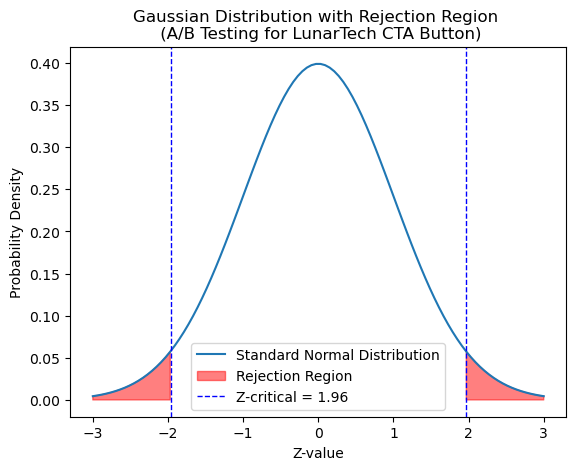

In [29]:
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x,mu, sigma)

plt.plot(x, y, label="Standard Normal Distribution")
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color='red', alpha=0.5, label="Rejection Region")
plt.axvline(Z_crit, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical = {Z_crit:.2f}')
plt.axvline(-Z_crit, color='blue', linestyle='dashed', linewidth=1)

plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region \n (A/B Testing for LunarTech CTA Button)')
plt.legend()
plt.show()

In [30]:
CI = [
    round((p_exp_hat - p_con_hat) - SE*Z_crit, 3),
    round((p_exp_hat - p_con_hat) + SE*Z_crit, 3)
]

print("Confidence Interval of the 2 sample Z-test is: ", CI)

Confidence Interval of the 2 sample Z-test is:  [user_id      0.399
click        0.399
group        0.399
timestamp     -inf
dtype: float64, user_id      0.426
click        0.426
group        0.426
timestamp      NaN
dtype: float64]
